# Tutorial 2: The HilbertSpace Abstraction

In this tutorial, we'll dive into the `HilbertSpace` class, which is the foundation for all vector spaces in the library. The key design idea is to provide a single, consistent interface for manipulating vectors, regardless of what that "vector" actually represents.

We will demonstrate this by:
1.  Creating a simple `EuclideanSpace` (for standard vectors) and a `Sobolev` space (for smooth functions on a circle).
2.  Generating random vectors in each space.
3.  Performing basic vector arithmetic (`+`, `*`, norms).
4.  Showing that the code for these operations is **identical** for both spaces, highlighting the power of the abstraction.



In [1]:
# To run in colab, uncomment the line below to install pygeoinf. 
#%pip install pygeoinf

import numpy as np
import matplotlib.pyplot as plt
import pygeoinf as inf
from pygeoinf.symmetric_space.circle import Sobolev
from pygeoinf.hilbert_space import EuclideanSpace

# For reproducibility
np.random.seed(0)

## 1. Defining Two Different Hilbert Spaces

Let's start by creating two very different types of `HilbertSpace`.

* **`EuclideanSpace`**: This is a simple, finite-dimensional space $\mathbb{R}^n$ where a vector is just a NumPy array.
* **`Sobolev`**: This is an infinite-dimensional function space, approximated by a high-dimensional vector. A "vector" here is a smooth function on a circle.

In [2]:
# A simple 5-dimensional Euclidean space
euclidean_space = EuclideanSpace(5)

# A space of smooth functions on a circle
# We'll use the convenient helper method to set it up.
sobolev_space = Sobolev.from_sobolev_parameters(2.0, 0.1)

print(f"Euclidean Space Dimension: {euclidean_space.dim}")
print(f"Sobolev Space Dimension: {sobolev_space.dim}")

Euclidean Space Dimension: 5
Sobolev Space Dimension: 378


## 2. Generating and Inspecting Vectors

Every `HilbertSpace` has methods to create vectors. The `.random()` method generates a random vector, and the `.zero` property gives the additive identity.

Let's generate two random vectors, `x` and `y`, in our `EuclideanSpace`.

In [3]:
# Generate vectors in the Euclidean space
x_euc = euclidean_space.random()
y_euc = euclidean_space.random()

print("--- Euclidean Space ---")
print(f"Type of a vector: {type(x_euc)}")
print(f"A random vector x:\n{x_euc}")
print(f"A random vector y:\n{y_euc}")

--- Euclidean Space ---
Type of a vector: <class 'numpy.ndarray'>
A random vector x:
[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
A random vector y:
[-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


Now, let's do the **exact same thing** for the `Sobolev` space. Notice that the syntax does not change at all. The library handles the complexity of creating a "random smooth function" behind the scenes.

In [4]:
# Generate vectors (functions) in the Sobolev space
x_sob = sobolev_space.random()
y_sob = sobolev_space.random()

print("--- Sobolev Space ---")
print(f"Type of a vector: {type(x_sob)}")
print(f"A 'vector' in this space is a NumPy array representing function values on a grid.")
print(f"Shape of the vector: {x_sob.shape}")

--- Sobolev Space ---
Type of a vector: <class 'numpy.ndarray'>
A 'vector' in this space is a NumPy array representing function values on a grid.
Shape of the vector: (378,)


### A Note on `.random()`

It's important to understand what the default `.random()` method does. It generates a vector whose **components** are drawn from a standard normal (Gaussian) distribution.

* For `EuclideanSpace`, this is fine; it's a standard random vector.
* For `Sobolev`, this produces a function that looks like "white noise." It is **not** a smooth function and does not have the statistical properties consistent with the Sobolev inner product.

The correct way to generate "nice" random functions with desired properties (like smoothness) is by sampling from a `GaussianMeasure`, which we will cover in a later tutorial. For now, we use `.random()` simply to get some vectors to manipulate.

## 3. Vector Manipulation

All `HilbertSpace` objects support standard vector operations like addition, scalar multiplication, and calculating norms. The power of the abstraction is that the syntax is identical, no matter how complex the underlying space is.

### A Note on Syntax: `space.add(x, y)` vs `x + y`

For the examples here (`EuclideanSpace` and `Sobolev`), the underlying vector representation is a NumPy array, which already supports standard arithmetic like `+` and `*`. You are free to use that direct syntax.

However, the `HilbertSpace` methods (`.add()`, `.multiply()`, etc.) provide a common, abstract interface. This ensures that your code will work for *any* `HilbertSpace`, even one whose underlying vector type does not support standard Python operators. We will use the `HilbertSpace` methods in these tutorials to emphasize the abstract nature of the library.

In [5]:
# --- Euclidean Space ---
z_euc = euclidean_space.add(x_euc, y_euc)
z_euc_scaled = euclidean_space.multiply(3.0, z_euc)

print("--- Euclidean Space ---")
print(f"x + y = \n{z_euc}")
print(f"3 * (x + y) = \n{z_euc_scaled}")

# --- Sobolev Space ---
# Note the identical syntax!
z_sob = sobolev_space.add(x_sob, y_sob)
z_sob_scaled = sobolev_space.multiply(3.0, z_sob)

print("\n--- Sobolev Space ---")
print(f"The same operations work seamlessly on the function vectors.")

--- Euclidean Space ---
x + y = 
[0.78677447 1.35024563 0.82738078 2.13767435 2.27815649]
3 * (x + y) = 
[2.3603234  4.05073688 2.48214233 6.41302304 6.83446948]

--- Sobolev Space ---
The same operations work seamlessly on the function vectors.


### Norms and Inner Products

We can also compute the length (norm) of a vector and the inner product between two vectors. For `EuclideanSpace`, this is the standard dot product. For the `Sobolev` space, it's a much more complex weighted inner product that accounts for the function's smoothness—but the method call is the same.

In [6]:
# --- Euclidean Space ---
norm_x_euc = euclidean_space.norm(x_euc)
inner_prod_euc = euclidean_space.inner_product(x_euc, y_euc)

print("--- Euclidean Space ---")
print(f"Norm of x: {norm_x_euc:.4f}")
print(f"Inner product of x and y: {inner_prod_euc:.4f}")

# --- Sobolev Space ---
# Identical syntax for a much more complex operation!
norm_x_sob = sobolev_space.norm(x_sob)
inner_prod_sob = sobolev_space.inner_product(x_sob, y_sob)

print("\n--- Sobolev Space ---")
print(f"Sobolev norm of the function x: {norm_x_sob:.4f}")
print(f"Sobolev inner product of functions x and y: {inner_prod_sob:.4f}")

--- Euclidean Space ---
Norm of x: 3.5692
Inner product of x and y: -0.9564

--- Sobolev Space ---
Sobolev norm of the function x: 4419.1617
Sobolev inner product of functions x and y: 185995.8688


## 4. Visualization

Let's visualize the results of our operations on the `Sobolev` space to see what the resulting functions look like.

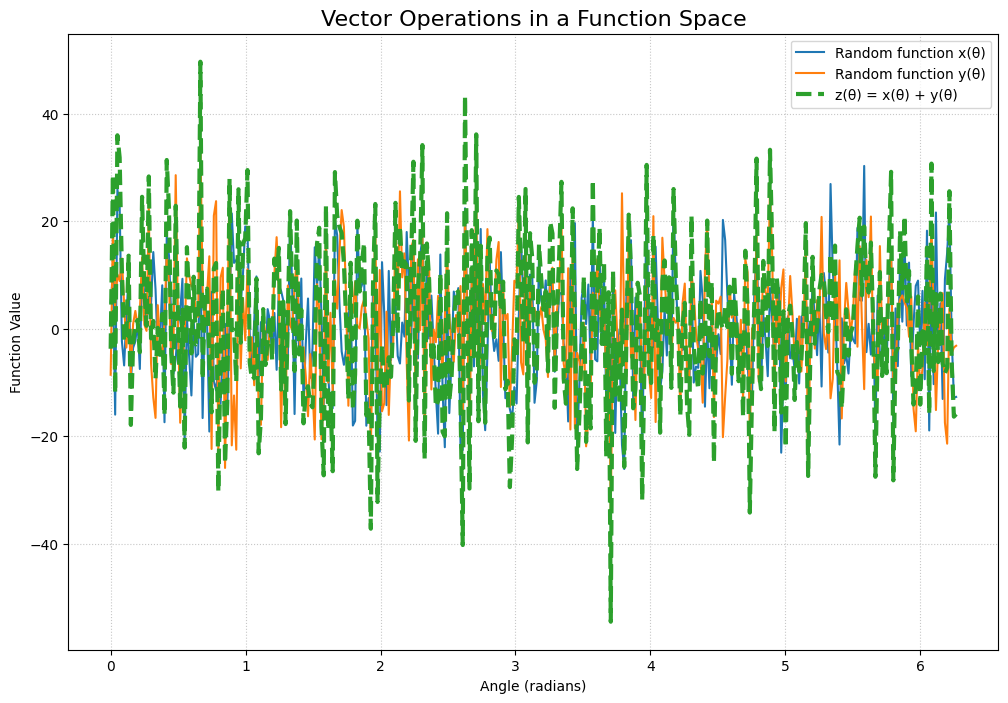

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the two random functions and their sum
sobolev_space.plot(x_sob, ax=ax, label='Random function x(θ)')
sobolev_space.plot(y_sob, ax=ax, label='Random function y(θ)')
sobolev_space.plot(z_sob, ax=ax, label='z(θ) = x(θ) + y(θ)', linewidth=3, linestyle='--')

ax.set_title("Vector Operations in a Function Space", fontsize=16)
ax.set_xlabel("Angle (radians)")
ax.set_ylabel("Function Value")
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)
plt.show()